# Impact Of Research In Post Graduate Admissions Analysis
#By- Aarush Kumar
#Dated: August 09,2021

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
grad_data= pd.read_csv('/home/aarush100616/Downloads/Projects/Impact of research in admission analysis/Admission_Predict.csv')
grad_data.drop(columns='Serial No.',inplace=True)
#grad_data=grad_data/grad_data.max()
grad_data.head(5)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

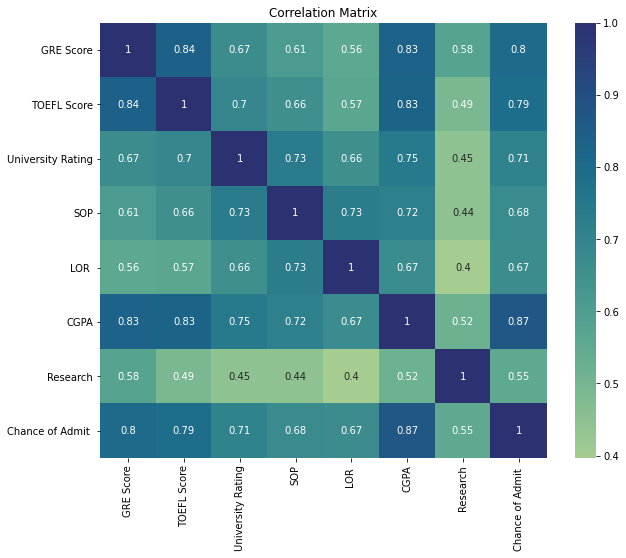

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(grad_data.corr(),annot=True,cmap="crest")
plt.title('Correlation Matrix')
plt.show()

In [4]:
lor_true_data=grad_data[grad_data['Research']==1].groupby('LOR ')
lor_false_data=grad_data[grad_data['Research']==0].groupby('LOR ')
lor_research_list=lor_true_data['Research'].count().to_list()
lor_research_list.insert(0,0)
lor_not_research_list=lor_false_data['Research'].count().to_list()
lor_research_ratio=[(lor_research_list[i]*100)/(lor_research_list[i]+lor_not_research_list[i]) for i in range(len(lor_not_research_list))]
unique_lor_classes= sorted(grad_data['LOR '].unique())
fig = px.bar(x=unique_lor_classes, y=lor_research_ratio,
             color=lor_research_ratio,
             height=600,
             color_continuous_scale='bluyl',
            labels={'x':'LOR Rating','y':'% Students With Research Experience'},
             title='Influence of Research in LOR'
           )
fig.add_trace(px.line(x=unique_lor_classes, y=lor_research_ratio,color_discrete_sequence=['red']).data[0].update(mode='markers+lines'))
fig.update_layout(title_x=0.5)
fig.show()

In [5]:
sop_true_data=grad_data[grad_data['Research']==1].groupby('SOP')
sop_false_data=grad_data[grad_data['Research']==0].groupby('SOP')
sop_research_list=sop_true_data['Research'].count().to_list()
sop_research_list.insert(0,0)
sop_not_research_list=sop_false_data['Research'].count().to_list()
sop_research_ratio=[(sop_research_list[i]*100)/(sop_research_list[i]+sop_not_research_list[i]) for i in range(len(sop_not_research_list))]
unique_sop_classes= sorted(grad_data['SOP'].unique())
fig = px.bar(x=unique_sop_classes, y=sop_research_ratio,
             color=sop_research_ratio,
             height=600,
             color_continuous_scale='bluyl',
            labels={'x':'SOP Rating','y':'% Students With Research Experience'},
             title='Influence of Research in Writing good SOP'
           )
fig.add_trace(px.line(x=unique_sop_classes, y=sop_research_ratio,color_discrete_sequence=['red']).data[0].update(mode='markers+lines'))
fig.update_layout(title_x=0.5)
fig.show()

In [6]:
g_data=grad_data.copy()
g_data['CGPA']=g_data['CGPA']*10//10
count_of_research = g_data.groupby('CGPA').count()['Research']
cgpa_cat= sorted(g_data['CGPA'].unique())
fig = px.pie(values=count_of_research,
             names=cgpa_cat, title='CGPA Of Students with Research Experience',
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             hole=0.5,
            labels={
                'values':'No of Students WIth Research Exp',
                'names':'CGPA Category'
            }
            )
fig.update_layout(title_x=0.5)
fig.show()

In [7]:
fig = px.scatter_3d(
    x=grad_data['Chance of Admit '],
    y=g_data['CGPA'],
    z=grad_data['University Rating'],
    color=grad_data['Research'],
    labels={
        'x':'Chance of Admit',
        'y':'CGPA',
        'z':'University Rating',
        'color':'Research'
    },
    color_continuous_scale='DarkMint',
    title='How Research Helps in Admission'
)
fig.update_layout(title_x=0.5)
fig.show()

### Conclusion
In this Notebook we have discussed the impact Research Has both directly and indirectly in the process of acquiring admissions in good universities. The experience gained by Research gives us a key advantage in our admission process along with the research itself.